In [2]:
# @title Import library
import pandas as pd

import numpy as np


import matplotlib.pyplot as plt


import seaborn as sns


In [4]:
# @title Import Data

df = pd.read_csv(r'https://github.com/YBI-Foundation/Dataset/raw/main/Francis%20Galton%20Regression%20Data.txt', delimiter= '\t')


df.head()



,Family,Father,Mother,Gender,Height,Kids
0,1,78.5,67.0,M,73.2,4
1,1,78.5,67.0,F,69.2,4
2,1,78.5,67.0,F,69.0,4
3,1,78.5,67.0,F,69.0,4
4,2,75.5,66.5,M,73.5,4


In [5]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 898 entries, 0 to 897
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Family  898 non-null    object 
 1   Father  898 non-null    float64
 2   Mother  898 non-null    float64
 3   Gender  898 non-null    object 
 4   Height  898 non-null    float64
 5   Kids    898 non-null    int64  
dtypes: float64(3), int64(1), object(2)
memory usage: 42.2+ KB


In [6]:

df.corr()

<ipython-input-6-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Father,Mother,Height,Kids
Father,1.000000,0.073665,0.275355,-0.160023
Mother,0.073665,1.000000,0.201655,-0.020030
Height,0.275355,0.201655,1.000000,-0.126910
Kids,-0.160023,-0.020030,-0.126910,1.000000


In [7]:
df.shape

(898, 6)

In [9]:
# @title Default MIssing Values
df.isna().sum()


Family    0
Father    0
Mother    0
Gender    0
Height    0
Kids      0
dtype: int64

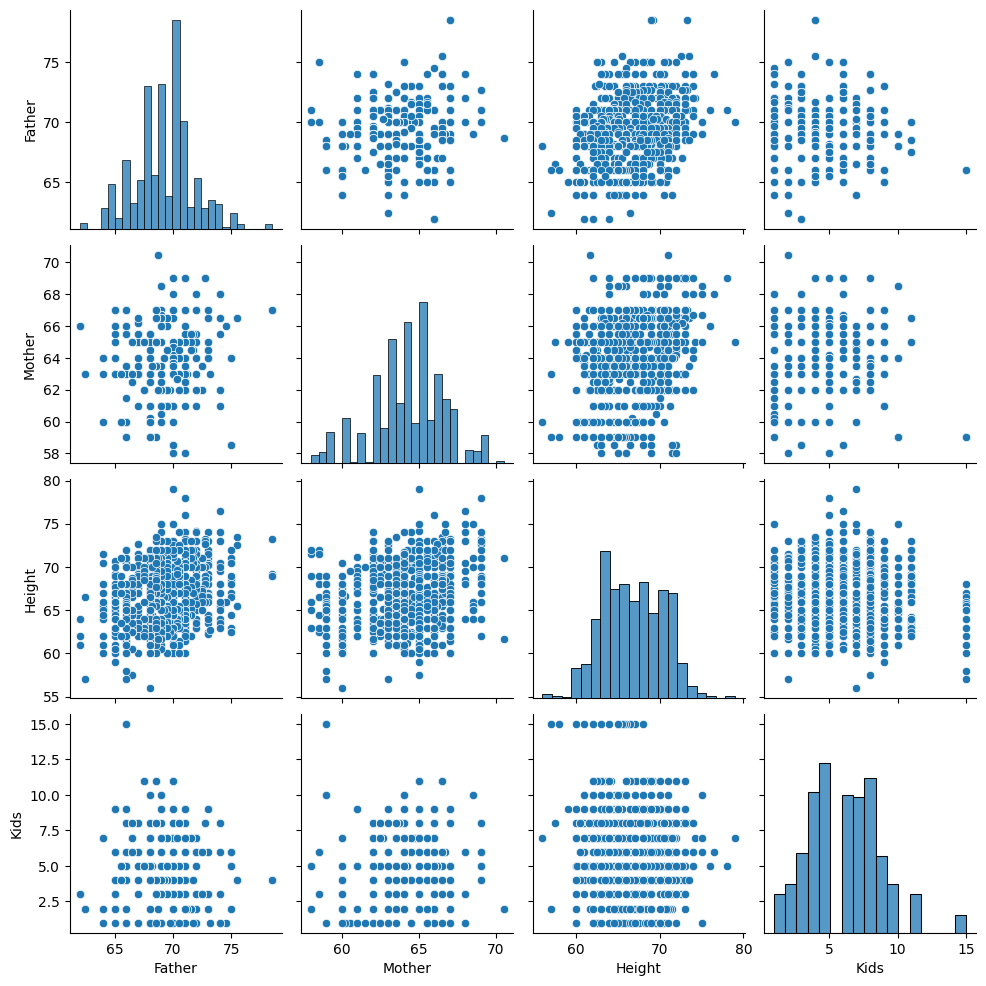

In [10]:
sns.pairplot(df)

In [11]:
y = df['Height']

In [12]:

X = df['Father']

In [13]:
slope = ((df['Father']-df['Father'].mean())*(df['Height']-df['Height'].mean())).sum()/((df['Father']-df['Father'].mean())**2).sum()


In [14]:

slope

0.3993812658985653

In [15]:
intercept = y.mean()-slope*X.mean()

In [16]:
intercept


39.110386837075396

In [17]:
X = df[['Father']]
y = df['Height']
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X,y)
print(lr.intercept_)
print(lr.coef_)

39.11038683707541
[0.39938127]


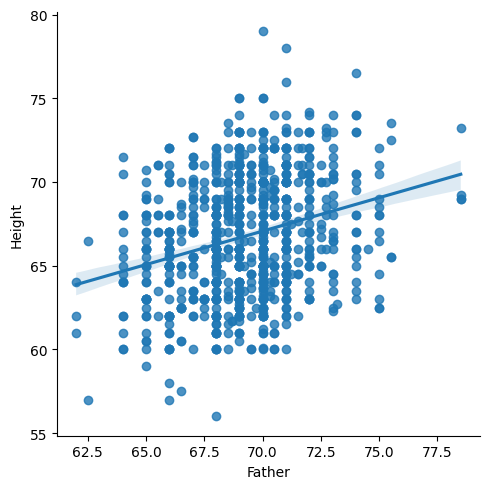

In [18]:
sns.lmplot(x = 'Father', y = 'Height', data = df)

<Axes: xlabel='Father', ylabel='Height'>

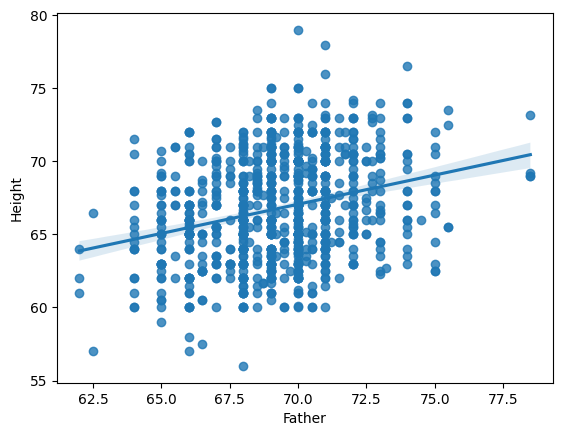

In [19]:
sns.regplot(x = 'Father', y = 'Height', data = df)

In [20]:

y_pred = lr.predict(X)

In [21]:

residual = y-y_pred

In [22]:
residual.shape, y.shape

((898,), (898,))

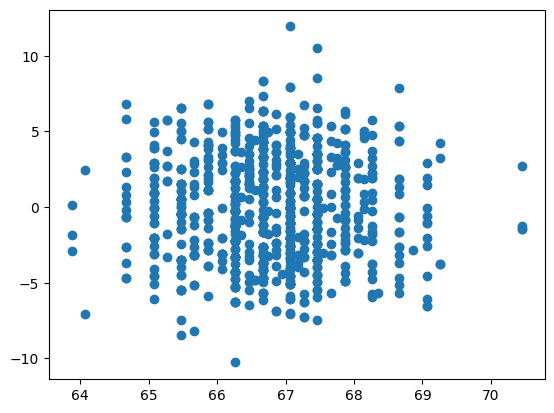

In [23]:
plt.scatter( x = y_pred, y = residual);


In [24]:

df.describe()

,Father,Mother,Height,Kids
count,898.000000,898.000000,898.000000,898.000000
mean,69.232851,64.084410,66.760690,6.135857
std,2.470256,2.307025,3.582918,2.685156
min,62.000000,58.000000,56.000000,1.000000
25%,68.000000,63.000000,64.000000,4.000000
50%,69.000000,64.000000,66.500000,6.000000
75%,71.000000,65.500000,69.700000,8.000000
max,78.500000,70.500000,79.000000,15.000000


In [25]:
df.groupby(['Gender']).mean()

<ipython-input-25-48ea916993b1>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(['Gender']).mean()


,Father,Mother,Height,Kids
Gender,,,,
F,69.302309,64.169515,64.110162,6.311778
M,69.168172,64.005161,69.228817,5.972043


In [26]:

69/64-1

0.078125

In [27]:

df.groupby(['Gender']).corr()


<ipython-input-27-217a295a6d10>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.corr is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(['Gender']).corr()


Father    Mother    Height      Kids
Gender                                               
F      Father  1.000000  0.041074  0.458761 -0.226864
       Mother  0.041074  1.000000  0.313698 -0.041436
       Height  0.458761  0.313698  1.000000 -0.122937
       Kids   -0.226864 -0.041436 -0.122937  1.000000
M      Father  1.000000  0.106335  0.391317 -0.091266
       Mother  0.106335  1.000000  0.334131 -0.004485
       Height  0.391317  0.334131  1.000000 -0.112378
       Kids   -0.091266 -0.004485 -0.112378  1.000000

In [28]:
X = np.array([2,4,6,8]).reshape(-1,1)
y = np.array([3,7,5,10])
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X,y)
print(lr.intercept_)
print(lr.coef_)

1.5
[0.95]
